In [ ]:
get_ipython().system('git clone https://github.com/JaMa-95/ML-Final.git')

Cloning into 'ML-Final'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3066 (delta 0), reused 0 (delta 0), pack-reused 3063
Receiving objects: 100% (3066/3066), 187.65 MiB | 41.14 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# Final Projext Machine Learning in Python
**Jakob Mattes**

**Maja1032@hs-karlsruhe.de**

**75269**

Made with google colab


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import random
from tqdm import tqdm

from tensorflow.keras import applications
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, MaxPool3D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#library np_utils to make labels categorical
from tensorflow.python.keras.utils import np_utils

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt

In [ ]:
categories = ['dog', 'panda', 'cat']
X_train, X_test = [], []
y_train, y_test = [], []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

########################################################################
########Changed the file path because of google colab###################
########################################################################

# load training data
for k, category in enumerate(categories):
    for f in os.listdir('/content/ML-Final/data/train/' + category):
        imagePaths.append(['/content/ML-Final/data/train/' + category+'/'+f, k])

# loop over the input images
for imagePath in tqdm(imagePaths):
    if 'ds_store' in imagePath[0].lower():
        continue
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    X_train.append(image)
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    y_train.append(label)




# load test data
imagePaths = []
for k, category in enumerate(categories):
    for f in os.listdir('/content/ML-Final/data/test/' + category):
        imagePaths.append(['/content/ML-Final/data/test/' + category+'/'+f, k])

# loop over the input images
for imagePath in tqdm(imagePaths):
    if 'ds_store' in imagePath[0].lower():
        continue
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    X_test.append(image)
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    y_test.append(label)


X_train, X_test, y_train, y_test  = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)


############
# Create here your code. X_train, X_test, and so on is already given and splitted.


100%|██████████| 153/153 [00:00<00:00, 296.39it/s]


In [ ]:
#Make y_train and y_test categorical (three dimensional vector)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#DataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False,
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=30, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    brightness_range=None, 
    shear_range=0.0, 
    zoom_range=0.2,
    channel_shift_range=0.0, 
    fill_mode='nearest', 
    cval=0.0,
    horizontal_flip=True, 
    vertical_flip=True, 
    rescale=1./255,
    preprocessing_function=None, 
    data_format=None, 
    validation_split=0.0, 
    dtype=None
)


datagen_test = ImageDataGenerator(rescale=1./255, samplewise_center=True)

#Fit datagen to training data
datagen.fit(X_train)

# Tried to normalize data but no better progress
#X_train = np.array(X_train)/255
#X_test = np.array(X_test)/255

#y_train = np.array(y_train)/255
#y_test = np.array(y_test)/255
X_train.shape

(2879, 32, 55, 3)

In [ ]:
#train_flow = datagen.flow_from_dataframe(X_train, x_col ='Filepath', y_col ='Target', target_size=(WIDTH, HEIGHT),interpolation='lanczos', validate_filenames = False)

# **Self Made Model Start here**

**Selfmade Model 1**

Good Accuracy/ Bad Val_Accuracy

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 55, 32)        896       
_________________________________________________________________
batch_normalization_50 (Batc (None, 32, 55, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 28, 64)        18496     
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 28, 64)        0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 16, 28, 64)        256       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 8, 14, 64)       

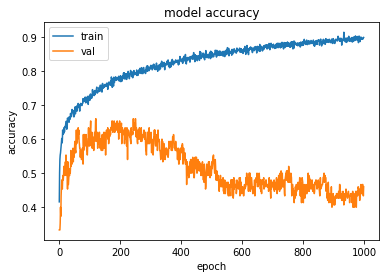

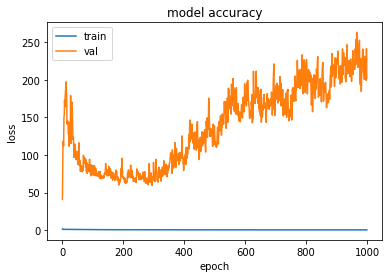

In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate to adam optimizer
opt = optimizers.Adam(learning_rate=0.00001)
#apply decay rate to optimizer
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping (not used)
es_callback = EarlyStopping(monitor='val_loss', patience=3)

#fit call to use the datagen. with 1000 epochs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 35) ,epochs = 1000 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))



# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Selfmade Model 2**

Fewer Neurons

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 55, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 55, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 28, 40)        11560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 28, 40)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 28, 40)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 14, 40)        

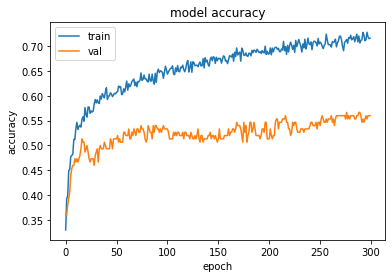

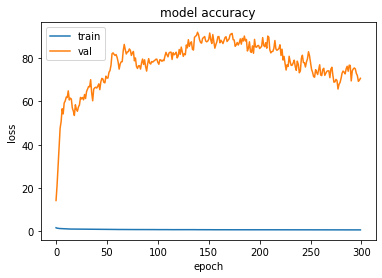

In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(40 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.6)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(54 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.4)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(40 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))


model.add(Flatten())
model.add(Dense(32, activation='relu'))

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate to adam optimizer
opt = optimizers.Adam(learning_rate=0.0001)
#apply decay rate to optimizer
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

#fit call to use the datagen. Used 300 epochs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 35) ,epochs = 300 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of th9e model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Selfmade Model 3**

Best Validation Accu

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 55, 32)        896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 55, 32)        128       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 28, 64)        18496     
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 28, 64)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 16, 28, 64)        256       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 14, 64)        

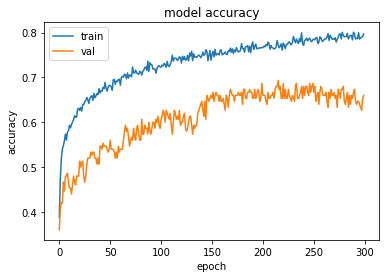

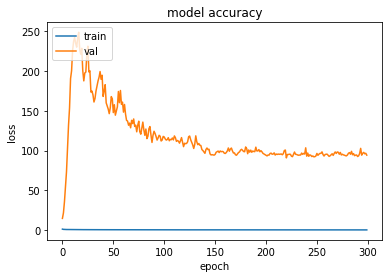

In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(40 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))


model.add(Flatten())
model.add(Dense(32, activation='relu'))

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate to adam optimizer
opt = optimizers.Adam(learning_rate=0.0001)
#apply decay rate
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping (Not used)
es_callback = EarlyStopping(monitor='val_loss', patience=3)

#fit call to use the datagen. Used 300 epochs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 35) ,epochs = 300 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of th9e model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Selfmade Model 4**

Very Unstable/ Reaches test Accu

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 55, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 55, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 28, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 28, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 14, 64)        

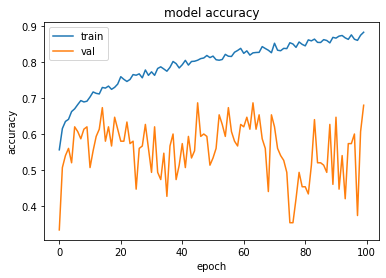

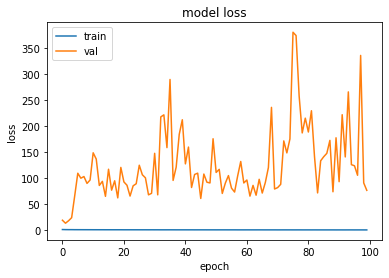

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((3,3) , strides = 2 , padding = 'same'))




model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate
opt = optimizers.Adam(learning_rate=0.0001)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

#fit call to use the datagen. 100 epichs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 35) ,epochs = 100 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of th9e model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Selfmade Model 5**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 55, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 55, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 55, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 28, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 28, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 28, 64)       

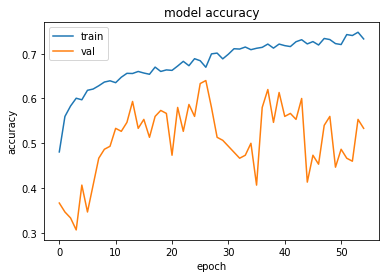

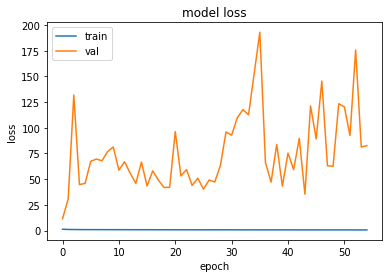

In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(40 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))


model.add(Flatten())
model.add(Dense(32, activation='relu'))

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate
opt = optimizers.Adam(learning_rate=0.0001)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

#fit call to use the datagen. 300 epochs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 35) ,epochs = 300 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of th9e model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Selfmade Model 6**

Higher Dropout Rate

More stable but lower test accuracy

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 55, 32)        896       
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 55, 32)        128       
_________________________________________________________________
dropout_42 (Dropout)         (None, 32, 55, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 28, 64)        18496     
_________________________________________________________________
dropout_43 (Dropout)         (None, 16, 28, 64)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 16, 28, 64)       

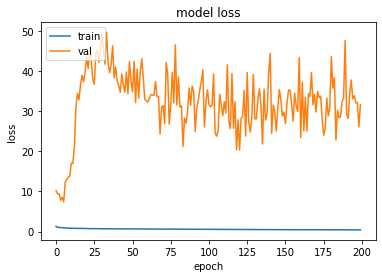

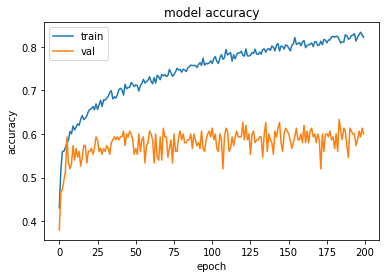

(0.33, 1.0)

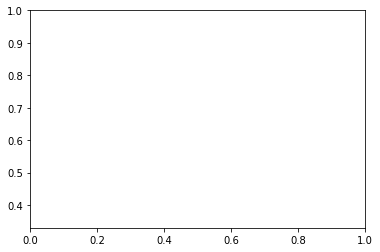

In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(Dropout(0.3)) # Dropout is optional.
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.4)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.4)) # Dropout is optional.
model.add(Dropout(0.3)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(40 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax'))

#apply learning rate
opt = optimizers.Adam(learning_rate=0.0001)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)


#fit call to use the datagen. 200 epichs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = bs) ,epochs = 200 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))
print(bs)



# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('loss'+str(bs)+'.png')

# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('accuracy'+str(bs)+'.png')


**Selfmade Model 7**


In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(Dropout(0.5)) # Dropout is optional.
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.6)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.6)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))




model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate
opt = optimizers.Adam(learning_rate=0.0001)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)


#fit call to use the datagen. 50 epichs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 50 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))



# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.xlim([0, 1])


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 55, 32)        896       
_________________________________________________________________
batch_normalization_99 (Batc (None, 32, 55, 32)        128       
_________________________________________________________________
dropout_92 (Dropout)         (None, 32, 55, 32)        0         
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 16, 28, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 28, 64)        18496     
_________________________________________________________________
dropout_93 (Dropout)         (None, 16, 28, 64)        0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 16, 28, 64)      

**Selfmade Model 8**

Small Network high Dropout

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 55, 16)        448       
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 55, 16)        64        
_________________________________________________________________
dropout_24 (Dropout)         (None, 32, 55, 16)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 28, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 28, 32)        4640      
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 28, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 16, 28, 32)       

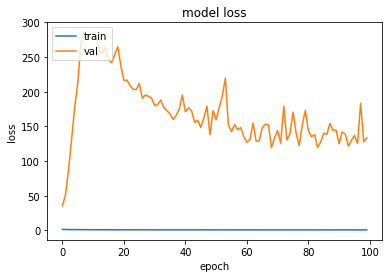

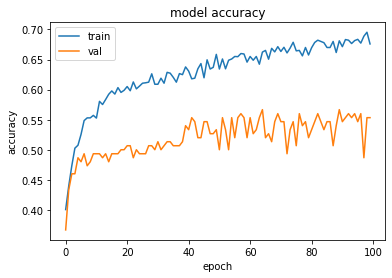

(0.0, 1.0)

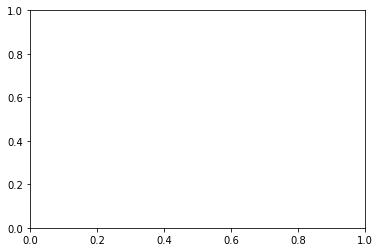

In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(16, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(Dropout(0.1)) # Dropout is optional.
model.add(MaxPool2D((2,2), strides=2, padding='same'))


model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))



model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate
opt = optimizers.Adam(learning_rate=0.00005)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)


#fit call to use the datagen. 100 epichs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 100 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))



# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Selfmade Model 9**

Smal Network

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 55, 16)        448       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 55, 16)        64        
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 55, 16)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 28, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 28, 32)        4640      
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 28, 32)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 16, 28, 32)       

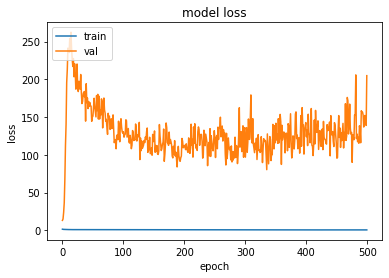

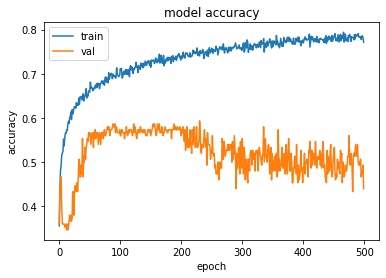

In [ ]:
# Define our CNN
model = Sequential()
model.add(Conv2D(16, (3,3), strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:],kernel_regularizer='l2')) # this layer has 32 filters. The filter size is: (3,3)
model.add(BatchNormalization()) # This is optional to avoid overfitting
model.add(Dropout(0.1)) # Dropout is optional.
model.add(MaxPool2D((2,2), strides=2, padding='same'))


model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))



model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1)) # Dropout is optional.
model.add(BatchNormalization()) # BatchNormalization is optional

# Use softmax and 3 ouput layers because of three labels
model.add(Dense(3, activation='softmax')) 

#apply learning rate
opt = optimizers.Adam(learning_rate=0.00005)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)


#fit call to use the datagen. 500 epichs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 500 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))



# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Application Model start here**

**VGG16**

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 55, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 55, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 55, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 27, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 27, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 27, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 13, 128)        0   

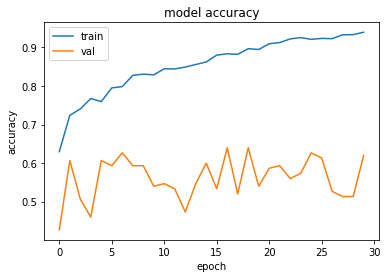

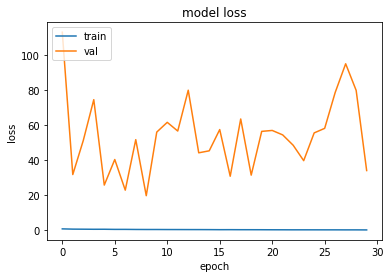

In [ ]:
# load existing CNN from tensorflow. Here we use VGG16, pretrained on imagenet. we will not include_top.
# include_top means the flatten layer + the following dense layers. Wen only use the CNN-blocks from this network.
model = applications.VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])


flat1 = Flatten()(model.output) # add a flatten to the VGG16
class1 = Dense(256, activation='relu')(flat1) # add a Dense layer after the flatten
# Use softmax and 3 ouput layers because of three labels
output = Dense(3, activation='softmax')(class1)

model = Model(inputs=model.inputs, outputs=output) # define our final model. The first part is from VGG16 and the output is the layer defined above

#apply learning rate
opt = optimizers.Adam(learning_rate=0.00005)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()

#Early stopping
es_callback = EarlyStopping(monitor='val_loss', patience=3)

#fit call to use the datagen. 30 epichs
diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 35) ,epochs = 30 , validation_data = (X_test, y_test))

#Evaluation part; printing accuracy
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))


# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**ResNet152V2**

In [ ]:
# load existing CNN from tensorflow. Here we use VGG16, pretrained on imagenet. we will not include_top.
# include_top means the flatten layer + the following dense layers. Wen only use the CNN-blocks from this network.
model = applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=X_train.shape[1:] ,kernel_regularizer='l2')

flat1 = Flatten()(model.output) # add a flatten to the VGG16
class1 = Dense(256, activation='relu')(flat1) # add a Dense layer after the flatten
# Use softmax and 3 ouput layers because of three labels
output = Dense(3, activation='softmax')(class1) # add a dense layer after the 256-dense layer

model = Model(inputs=model.inputs, outputs=output) # define our final model. The first part is from VGG16 and the output is the layer defined above

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 10 , validation_data = (X_test, y_test))
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print("Resnet152")
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))

# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 32, 55, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 61, 3)    0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 28, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 30, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

**EfficientNetB7**

In [ ]:
# load existing CNN from tensorflow. Here we use VGG16, pretrained on imagenet. we will not include_top.
# include_top means the flatten layer + the following dense layers. Wen only use the CNN-blocks from this network.
model = applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

flat1 = Flatten()(model.output) # add a flatten to the VGG16
class1 = Dense(256, activation='relu')(flat1) # add a Dense layer after the flatten
class2 = BatchNormalization()(class1) # This is optional to avoid overfitting
class3 = Dropout(0.2)(class2) # Dropout is optional.


# Use softmax and 3 ouput layers because of three labels
output = Dense(3, activation='softmax')(class3) # add a dense layer after the 256-dense layer

model = Model(inputs=model.inputs, outputs=output) # define our final model. The first part is from VGG16 and the output is the layer defined above

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 30 , validation_data = (X_test, y_test))
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print("Inception EfficientNetB7")
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))

# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.xlim([0, 1])
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 55, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 32, 55, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 32, 55, 3)    7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 57, 3)    0           normalization_2[0][0]            
______________________________________________________________________________________________

KeyboardInterrupt: ignored

**ResNet50**

In [ ]:
# load existing CNN from tensorflow. Here we use VGG16, pretrained on imagenet. we will not include_top.
# include_top means the flatten layer + the following dense layers. Wen only use the CNN-blocks from this network.
model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

flat1 = Flatten()(model.output) # add a flatten to the VGG16
class1 = Dense(256, activation='relu')(flat1) # add a Dense layer after the flatten
# Use softmax and 3 ouput layers because of three labels
output = Dense(3, activation='softmax')(class1) # add a dense layer after the 256-dense layer

model = Model(inputs=model.inputs, outputs=output) # define our final model. The first part is from VGG16 and the output is the layer defined above


#apply learning rate
opt = optimizers.Adam(learning_rate=0.00005)
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # make sure we have categorical_crossentropy as loss
model.summary()


model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 10 , validation_data = (X_test, y_test))
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print("Inception Resnet 50")
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))

94773248/94765736 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 55, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 61, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 28, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 28, 64)   256         conv1_conv[0][0]                 
___________________________

**MobilNet**

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 55, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 28, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 28, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 28, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 28, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 28, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 16, 28, 32)        0  

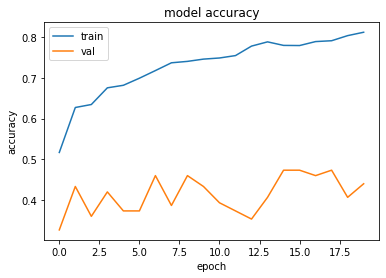

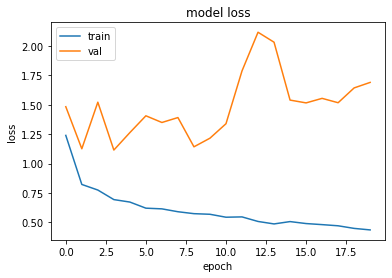

In [ ]:
# load existing CNN from tensorflow. Here we use VGG16, pretrained on imagenet. we will not include_top.
# include_top means the flatten layer + the following dense layers. Wen only use the CNN-blocks from this network.
model = applications.MobileNet(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

flat1 = Flatten()(model.output) # add a flatten to the VGG16
class1 = Dense(128, activation='relu')(flat1) # add a Dense layer after the flatten
#class2 = add(Dropout(0.1)) # Dropout is optional.
class2 = BatchNormalization()(class1) # BatchNormalization is optional

# Use softmax and 3 ouput layers because of three labels
output = Dense(3, activation='softmax')(class1) # add a dense layer after the 256-dense layer

model = Model(inputs=model.inputs, outputs=output) # define our final model. The first part is from VGG16 and the output is the layer defined above


lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


diagramm =model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = (X_test, y_test))
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print("Inception MobileNet")
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))

# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**EfficientNetB0**

In [ ]:
# load existing CNN from tensorflow. Here we use VGG16, pretrained on imagenet. we will not include_top.
# include_top means the flatten layer + the following dense layers. Wen only use the CNN-blocks from this network.
model = applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

flat1 = Flatten()(model.output) # add a flatten to the VGG16
class1 = Dense(256, activation='relu')(flat1) # add a Dense layer after the flatten
# Use softmax and 3 ouput layers because of three labels
output = Dense(3, activation='softmax')(class1) # add a dense layer after the 256-dense layer

model = Model(inputs=model.inputs, outputs=output) # define our final model. The first part is from VGG16 and the output is the layer defined above


lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 100 , validation_data = (X_test, y_test))
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print("Inception Resnet 50")
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))

# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

16711680/16705208 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 55, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 32, 55, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 32, 55, 3)    7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 57, 3)    0           normalization_1[0][0]            
___________________________

KeyboardInterrupt: ignored

**DenseNet201**

In [ ]:
# load existing CNN from tensorflow. Here we use VGG16, pretrained on imagenet. we will not include_top.
# include_top means the flatten layer + the following dense layers. Wen only use the CNN-blocks from this network.
model = applications.DenseNet201(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

flat1 = Flatten()(model.output) # add a flatten to the VGG16
class1 = Dense(256, activation='relu')(flat1) # add a Dense layer after the flatten
class2 = BatchNormalization()(class1) # This is optional to avoid overfitting
class3 = Dropout(0.2)(class2) # Dropout is optional.

# Use softmax and 3 ouput layers because of three labels
output = Dense(3, activation='softmax')(class3) # add a dense layer after the 256-dense layer

model = Model(inputs=model.inputs, outputs=output) # define our final model. The first part is from VGG16 and the output is the layer defined above


lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()



diagramm = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 100 , validation_data = (X_test, y_test))
y_pred_model1 = np.argmax(model.predict(X_test), axis=-1)
y_test_model1 = np.argmax(y_test, axis=-1)
y_train_model1 = np.argmax(y_train, axis=-1)
print("Inception DensNet201")
print('Train Accuracy of the model is', accuracy_score(y_train_model1, np.argmax(model.predict(X_train), axis=-1)))
print('Test Accuracy of the model is', accuracy_score(y_test_model1, y_pred_model1))

# Plot accuracy graph
plt.plot(diagramm.history['accuracy'])
plt.plot(diagramm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.xlim([0, 1])
plt.show()

# Plot loss graph
plt.plot(diagramm.history['loss'])
plt.plot(diagramm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 32, 55, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 38, 61, 3)    0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 28, 64)   9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 28, 64)   256         conv1/conv[0][0]                 
___________________________________________________________________________________________

KeyboardInterrupt: ignored